<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

이번 스프린트에서는 포트폴리오 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 과제를 수행합니다. 프로젝트를 위한 데이터를 최종 선택하기 전에 여러 가능한 데이터세트를 살펴보고 간단한 모델까지 학습해 보는 것을 추천드립니다.

### 1) 타겟으로 사용할 특성을 선택합니다.
- **(객관식) 다음과 같은 상황에 대한 설명 중 맞는 설명을 고르세요.**
    - 특성 3개를 사용해 가장 성능이 좋은 모델 A를 만들고 또 특성 5개를 사용해 최적의 모델 B를 학습하였습니다. 이때 모델 A에서 선택된 특성은 A1, A2, A3 입니다.
    1. 최적의 모델 B에는 특성 A1, A2, A3가 항상 선택됩니다.
    2. 최적의 모델 B 학습시 특성 A1, A2, A3는 전혀 사용되지 않습니다.
    3. 최적의 모델 B에 특성 A1, A2, A3가 선택될지 알 수 없습니다.

In [ ]:
# 답 : 3

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# 자료 출처 : 데이콘
# gas_supply(공공데이터포털) : https://www.data.go.kr/data/15091497/fileData.do
# weather(기상자료개방포털) : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36
# gas_supply는 가스 공급량, weather는 서울 기준으로 관측된 날씨 데이터

gas_supply = pd.read_csv('https://docs.google.com/uc?export=download&id=1rqMv8BD_1ebKPfk7QxcpL6vxgeakzEz6', encoding='cp949')
weather = pd.read_csv('https://docs.google.com/uc?export=download&id=11ZGfCOqYVNjwtfgVXKEhyC_LRLGDqFdp')

target = 'gas_supply'

In [ ]:
gas_supply.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [ ]:
weather.head()

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,2013-01-01 0:00,-8.3,NaN,3.6,50.0,56.0,1.8,-15.5,1010.3,1021.5,NaN,NaN,6.4,NaN,3.0,3.0,Sc,10.0,2000.0,NaN,NaN,-3.3,-2.9,-1.6,-0.5,0.3
1,108,2013-01-01 1:00,-8.5,NaN,4.0,50.0,57.0,1.8,-15.5,1010.0,1021.2,NaN,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.4,-2.9,-1.6,-0.5,0.3
2,108,2013-01-01 2:00,-8.4,NaN,4.0,70.0,60.0,2.0,-14.7,1009.4,1020.6,NaN,NaN,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.4,-3.0,-1.6,-0.5,0.4
3,108,2013-01-01 3:00,-8.1,NaN,3.4,70.0,58.0,1.9,-14.9,1009.2,1020.4,NaN,NaN,6.4,NaN,6.0,6.0,Ac,35.0,2000.0,13.0,NaN,-3.4,-3.0,-1.6,-0.5,0.3
4,108,2013-01-01 4:00,-8.2,NaN,3.8,70.0,58.0,1.9,-15.0,1008.2,1019.4,NaN,NaN,6.4,NaN,6.0,6.0,Ac,35.0,2000.0,NaN,NaN,-3.4,-2.9,-1.7,-0.5,0.3


In [ ]:
gas_supply.shape, weather.shape

((368088, 4), (52584, 27))

In [ ]:
gas_supply.isna().sum()

연월일    0
시간     0
구분     0
공급량    0
dtype: int64

In [ ]:
weather.isna().sum()

지점                   0
일시                   0
기온(°C)               5
강수량(mm)          47640
풍속(m/s)             46
풍향(16방위)            46
습도(%)               21
증기압(hPa)            12
이슬점온도(°C)           12
현지기압(hPa)            7
해면기압(hPa)            4
일조(hr)           23868
일사(MJ/m2)        24055
적설(cm)           50189
3시간신적설(cm)       52431
전운량(10분위)        10776
중하층운량(10분위)       7126
운형(운형약어)         23141
최저운고(100m )      27557
시정(10m)           4345
지면상태(지면상태코드)     47468
현상번호(국내식)        33724
지면온도(°C)            54
5cm 지중온도(°C)        57
10cm 지중온도(°C)       51
20cm 지중온도(°C)       71
30cm 지중온도(°C)      136
dtype: int64

In [ ]:
# 날씨 특성 중 가스 공급량에 직접적인 관계가 있다고 판단되는 특성만 남기고 나머지 제거
# 남길 특성 : 일시, 기온, 강수량, 풍속, 습도
# 그 외 특성들은 위 4개 특성 내에 반영되는 것으로 간주함
cols = ['일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']

weather = weather.loc[:, cols]
weather.head()

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,2013-01-01 0:00,-8.3,NaN,3.6,56.0
1,2013-01-01 1:00,-8.5,NaN,4.0,57.0
2,2013-01-01 2:00,-8.4,NaN,4.0,60.0
3,2013-01-01 3:00,-8.1,NaN,3.4,58.0
4,2013-01-01 4:00,-8.2,NaN,3.8,58.0


In [ ]:
# 강수량은 0으로 대체(1년 중 비가 오지 않는 날이 더 많기 때문)
weather['강수량(mm)'] = weather['강수량(mm)'].fillna(0)

In [ ]:
# 기온, 풍속, 습도는 결측치 수가 적으므로 평균값으로 대체
weather = weather.fillna(weather.mean())

In [ ]:
# 결측치 제거 여부 확인
weather.isna().sum()

일시         0
기온(°C)     0
강수량(mm)    0
풍속(m/s)    0
습도(%)      0
dtype: int64

In [ ]:
# 가스 공급량 데이터 중 구분 특성으로 인해 데이터의 개수가 늘어남
# 구분 특성으로 인해 나누어진 데이터들을 '날짜:시간'으로 묶어서 합하기

# 1) 연월일과 시간을 합친 특성 만들기
tmp = gas_supply.copy()
tmp['date_time'] = tmp['연월일'].astype(str) + ':' +tmp['시간'].astype(str)

tmp.head()

,연월일,시간,구분,공급량,date_time
0,2013-01-01,1,A,2497.129,2013-01-01:1
1,2013-01-01,2,A,2363.265,2013-01-01:2
2,2013-01-01,3,A,2258.505,2013-01-01:3
3,2013-01-01,4,A,2243.969,2013-01-01:4
4,2013-01-01,5,A,2344.105,2013-01-01:5


In [ ]:
# 2) 합친 특성을 사용하여 '날짜:시간'별 공급량 구하기
tmp = tmp.groupby('date_time').sum().reset_index().drop('시간', axis=1)
tmp.head()

,date_time,공급량
0,2013-01-01:1,13723.082
1,2013-01-01:10,15665.922
2,2013-01-01:11,15761.498
3,2013-01-01:12,14532.586
4,2013-01-01:13,13150.738


In [ ]:
# 3) 합쳤던 날짜와 시간을 분리
tmp['date'] = tmp.date_time.str.split(':').str[0]
tmp['time'] = tmp.date_time.str.split(':').str[1]
tmp = tmp.drop('date_time', axis=1)
tmp.head()

,공급량,date,time
0,13723.082,2013-01-01,1
1,15665.922,2013-01-01,10
2,15761.498,2013-01-01,11
3,14532.586,2013-01-01,12
4,13150.738,2013-01-01,13


In [ ]:
tmp.dtypes

공급량     float64
date     object
time     object
dtype: object

In [ ]:
# 4) 날짜, 시간 순으로 재정렬
tmp.date = pd.to_datetime(tmp.date)
tmp.time = pd.to_numeric(tmp.time)

tmp = tmp.sort_values(by=['date', 'time']).reset_index(drop=True)
tmp.head()

,공급량,date,time
0,13723.082,2013-01-01,1
1,12919.010,2013-01-01,2
2,12174.490,2013-01-01,3
3,12146.658,2013-01-01,4
4,12667.666,2013-01-01,5


In [ ]:
# 가스 공급량 데이터와 날씨 데이터 합치기
gas_supply = tmp

df = pd.concat([gas_supply, weather], axis=1)
df.head()

,공급량,date,time,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,13723.082,2013-01-01,1,2013-01-01 0:00,-8.3,0.0,3.6,56.0
1,12919.010,2013-01-01,2,2013-01-01 1:00,-8.5,0.0,4.0,57.0
2,12174.490,2013-01-01,3,2013-01-01 2:00,-8.4,0.0,4.0,60.0
3,12146.658,2013-01-01,4,2013-01-01 3:00,-8.1,0.0,3.4,58.0
4,12667.666,2013-01-01,5,2013-01-01 4:00,-8.2,0.0,3.8,58.0


In [ ]:
# 가스 공급량과 날씨의 날짜 및 시간이 일치하도록 통합하였음
# 그러나 날짜와 시간 그 자체로는 공급량과 직접적인 관련이 없는 것으로 판단함
# 실질적으로 관계가 있는 것은 기온, 강수량 등의 날씨 정보라고 판단함
# 따라서 날짜, 시간과 관련된 특성 제거
dels = ['date', 'time', '일시']
df = df.drop(dels, axis=1)

# 컬럼명 변경
# 공급량, 기온(°C),	강수량(mm),	풍속(m/s),	습도(%)
df.columns = ['gas_supply', 'temperature', 'precipitation', 'wind_speed', 'humidity']
df.head()

,gas_supply,temperature,precipitation,wind_speed,humidity
0,13723.082,-8.3,0.0,3.6,56.0
1,12919.010,-8.5,0.0,4.0,57.0
2,12174.490,-8.4,0.0,4.0,60.0
3,12146.658,-8.1,0.0,3.4,58.0
4,12667.666,-8.2,0.0,3.8,58.0


In [ ]:
df.describe()

,gas_supply,temperature,precipitation,wind_speed,humidity
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,6636.700256,13.202486,0.123874,2.387641,59.519053
std,4074.303325,11.266960,1.090455,1.358259,19.928065
min,786.995000,-18.000000,0.000000,0.000000,7.000000
25%,3651.625000,3.700000,0.000000,1.400000,44.000000
50%,5011.122500,14.300000,0.000000,2.200000,59.000000
75%,9550.072750,22.900000,0.000000,3.200000,75.000000
max,23180.309000,39.400000,50.500000,10.600000,100.000000


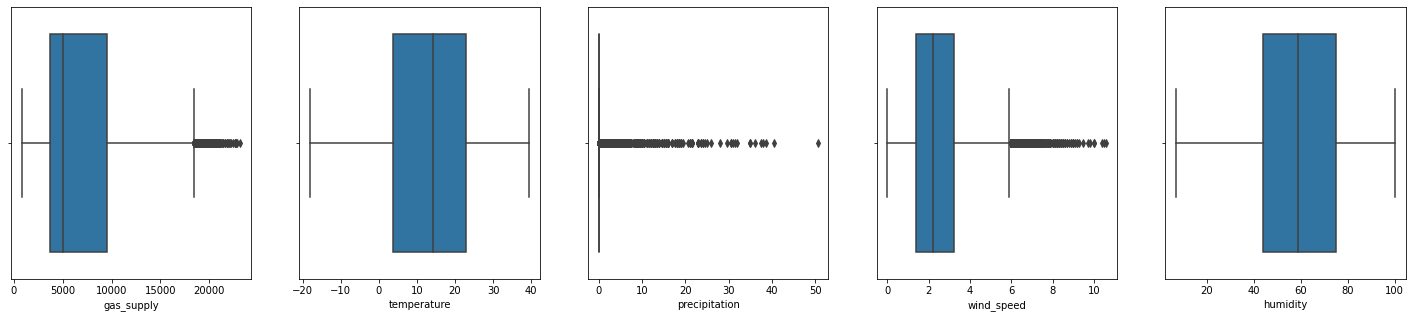

In [ ]:
col_list = df.columns

def checkOutlier(df, cols):
  fig, axes = plt.subplots(1, 5, figsize=(25, 5))
  for i, col in enumerate(col_list):
    sns.boxplot(x=col, data=df, ax=axes[i])

checkOutlier(df, col_list)

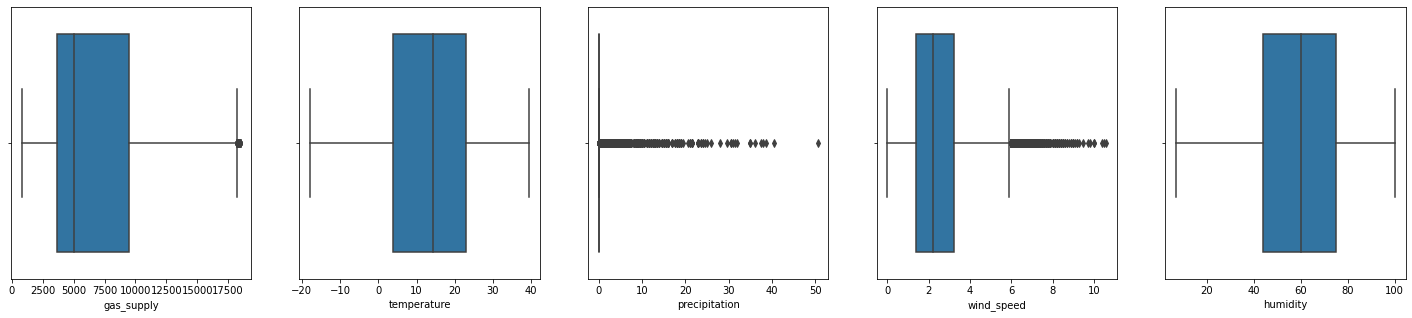

In [ ]:
# 타겟 이상치 제거하기
df = df[df[target] < np.percentile(df[target], 99.5)]
checkOutlier(df, col_list)

In [ ]:
df.shape

(52321, 5)

In [ ]:
# 특성과 타겟의 상관관계 보기
df.corr()

,gas_supply,temperature,precipitation,wind_speed,humidity
gas_supply,1.000000,-0.852480,-0.060798,0.071952,-0.268800
temperature,-0.852480,1.000000,0.055976,0.016616,0.141540
precipitation,-0.060798,0.055976,1.000000,0.025802,0.194767
wind_speed,0.071952,0.016616,0.025802,1.000000,-0.212817
humidity,-0.268800,0.141540,0.194767,-0.212817,1.000000


6571.254523900522


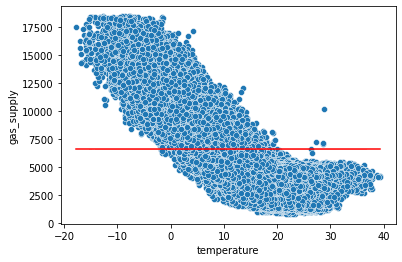

In [ ]:
# 가장 상관관계가 높은 온도와 타겟의 관계 시각화해보기
baseline = df.gas_supply.mean() # 기준 모델 : 타겟(gas_supply)의 평균값
print(baseline)

sns.scatterplot(x=df.temperature, y=df.gas_supply)
sns.lineplot(x=df.temperature, y=baseline, color='red'); # 기준 모델 시각화

In [ ]:
# 기준 성능
errors = baseline - df['gas_supply']
baseline_mae = errors.abs().mean()
baseline_mae

3349.347001163708

### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.
- **(객관식) 다음 설명 중 가장 틀린 항목을 고르세요.**
    1. 특정한 종목의 다음날 주식 종가를 예측하는 문제는 Supervised Learning 문제이다.
    2. 다음날 KOSPI 지수가 증가할지 감소할지 예측하는 문제는 Classification 문제이다.
    3. 축구 경기 도중에 승패를 예측하는 모델을 만들기 위해서는 실시간 통계 정보와 경기마다 승패 데이터가 필요하다.
    4. 이번 시즌 토트넘 선수들의 개인 통계 데이터(슛, 도움, ...)를 사용해서 다음 토트넘 경기의 승패를 예측할 수 있다.
   

In [ ]:
# 답 : 4

In [ ]:
# 가스 공급량은 수치형(연속적)이므로 회귀 문제
# 사용 가능한 방법 : 선형 회귀, 릿지 회귀, 결정 트리, 랜덤 포레스트

# 훈련 / 검증 / 테스트 셋으로 분리
train, test = train_test_split(df, test_size=0.30, random_state=2)
train, val = train_test_split(train, test_size=0.30, random_state=2)

train.shape, val.shape, test.shape

((25636, 5), (10988, 5), (15697, 5))

In [ ]:
# 특성과 타겟 분리하기
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

### 3) 타겟의 분포를 분석하고 사용할 평가지표를 선택합니다. 평가지표를 선택한 이유를 설명하세요.
- 분류: 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)
- 회귀: 타겟 분포가 right-skewed 인지? log-transform을 사용할 것인지?
- 분류: 다수 클래스(majority class) 비율이 50%~70% 인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀: MAE, RMSE, R^2 등을 사용할 수 있습니다.
- **(객관식) 같은 데이터로 스팸을 예측하는 모델 A와 B를 만들었습니다. 다음 설명 중 가장 올바른 항목을 선택하고 과제 제출폼에 제출하세요.**
    1. A의 재현율은 80%이고 B의 재현율은 60%일 때 A가 더 좋은 모델이다.
    2. A의 정밀도는 80%이고 B의 정밀도는 60%일 때 A가 더 좋은 모델이다.
    3. A는 B보다 정밀도는 높지만 재현율은 낮다. A가 더 좋은 모델이다.
    4. A는 B보다 재현율은 높지만, 정밀도는 낮다. A가 더 좋은 모델이다.
    5. A는 B보다 정밀도, 재현율 모두 높다. A가 더 좋은 모델이다.

In [ ]:
# 답 : 5

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import randint, uniform

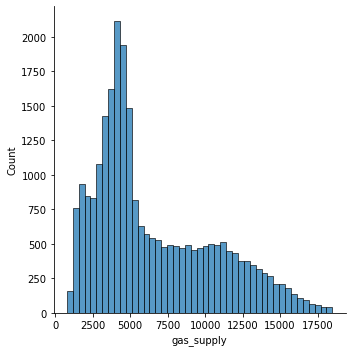

In [ ]:
sns.displot(y_train, kde=False);

In [ ]:
# 분포 형태가 right-skewed임
# 로그 변환을 사용하여 비대칭 분포 형태를 정규 분포 형태로 변환 필요

# 1) 선형 회귀
pipe = make_pipeline(
    StandardScaler(),    # 각 특성별 스케일을 통일시켜줌
    LinearRegression(n_jobs=-1)
)

tt = TransformedTargetRegressor(regressor=pipe,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)
print(tt.score(X_val, y_val))

y_pred = tt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

0.7594612405948745
Test MAE: 1,501
R2 Score: 0.7527



In [ ]:
# 2) 릿지 회귀
alphas = [0, 0.001, 0.01, 0.1, 1]

pipe_ridge = make_pipeline(
    StandardScaler(),    # 각 특성별 스케일을 통일시켜줌
    RidgeCV(alphas=alphas, cv=5)
)

tt_ridge = TransformedTargetRegressor(regressor=pipe_ridge,
                                func=np.log1p, inverse_func=np.expm1)

tt_ridge.fit(X_train, y_train)
print(tt_ridge.score(X_val, y_val))

y_pred_ridge = tt_ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Test MAE: {mae_ridge:,.0f}')
print(f'R2 Score: {r2_ridge:,.4f}\n')

print(f'alpha: {tt_ridge.regressor_.named_steps.ridgecv.alpha_}')

0.759462161786495
Test MAE: 1,501
R2 Score: 0.7527

alpha: 1.0


In [ ]:
# 3) 결정 트리
pipe_dt = make_pipeline(
    DecisionTreeRegressor(random_state=2)
)

tt_dt = TransformedTargetRegressor(regressor=pipe_dt,
                                func=np.log1p, inverse_func=np.expm1)

tt_dt.fit(X_train, y_train)
print('훈련 정확도: ', tt_dt.score(X_train, y_train))
print('검증 정확도: ', tt_dt.score(X_val, y_val))

y_pred_dt = tt_dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Test MAE: {mae_dt:,.0f}')
print(f'R2 Score: {r2_dt:,.4f}\n')

훈련 정확도:  0.9985379743093347
검증 정확도:  0.6591315701654124
Test MAE: 1,734
R2 Score: 0.6484



In [ ]:
# 과적합 줄이기 및 최적화
dists = {
    'decisiontreeregressor__splitter': ['best', 'random'],
    'decisiontreeregressor__max_depth': [5, 10, 15, 20, None],
    'decisiontreeregressor__min_samples_split': randint(2, 50),
    'decisiontreeregressor__min_samples_leaf': randint(1, 50),
    'decisiontreeregressor__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe_dt, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='r2',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


In [ ]:
tt_dt_opt = TransformedTargetRegressor(regressor=clf.best_estimator_,
                                func=np.log1p, inverse_func=np.expm1)

tt_dt_opt.fit(X_train, y_train)
print('훈련 정확도: ', tt_dt_opt.score(X_train, y_train))
print('검증 정확도: ', tt_dt_opt.score(X_val, y_val))

y_pred_dt_opt = tt_dt_opt.predict(X_test)

mae_dt_opt = mean_absolute_error(y_test, y_pred_dt_opt)
r2_dt_opt = r2_score(y_test, y_pred_dt_opt)
print(f'Test MAE: {mae_dt_opt:,.0f}')
print(f'R2 Score: {r2_dt_opt:,.4f}\n')

훈련 정확도:  0.8352720877536755
검증 정확도:  0.8208041130537242
Test MAE: 1,310
R2 Score: 0.8128



In [ ]:
# 4) 랜덤 포레스트
pipe_rf = make_pipeline(
    RandomForestRegressor(n_jobs=-1, random_state=2)
)

tt_rf = TransformedTargetRegressor(regressor=pipe_rf,
                                func=np.log1p, inverse_func=np.expm1)

tt_rf.fit(X_train, y_train)
print('훈련 정확도: ', tt_rf.score(X_train, y_train))
print('검증 정확도: ', tt_rf.score(X_val, y_val))

y_pred_rf = tt_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Test MAE: {mae_rf:,.0f}')
print(f'R2 Score: {r2_rf:,.4f}\n')

훈련 정확도:  0.9699506511604965
검증 정확도:  0.805298449223222
Test MAE: 1,334
R2 Score: 0.8028



In [ ]:
# 과적합 줄이기 및 최적화
dists_rf = {
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_depth': [5, 10, 15, 20, None],
    'randomforestregressor__min_samples_split': randint(2, 50),
    'randomforestregressor__min_samples_leaf': randint(1, 50),
    'randomforestregressor__max_features': uniform(0, 1)
}

clf_rf = RandomizedSearchCV(
    pipe_rf, 
    param_distributions=dists_rf, 
    n_iter=50, 
    cv=3, 
    scoring='r2',  
    verbose=1,
    n_jobs=-1
)

clf_rf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.8min finished


In [ ]:
tt_rf_opt = TransformedTargetRegressor(regressor=clf_rf.best_estimator_,
                                func=np.log1p, inverse_func=np.expm1)

tt_rf_opt.fit(X_train, y_train)
print('훈련 정확도: ', tt_rf_opt.score(X_train, y_train))
print('검증 정확도: ', tt_rf_opt.score(X_val, y_val))

y_pred_rf_opt = tt_rf_opt.predict(X_test)

mae_rf_opt = mean_absolute_error(y_test, y_pred_rf_opt)
r2_rf_opt = r2_score(y_test, y_pred_rf_opt)
print(f'Test MAE: {mae_rf_opt:,.0f}')
print(f'R2 Score: {r2_rf_opt:,.4f}\n')

훈련 정확도:  0.8413144168136925
검증 정확도:  0.8297855489691037
Test MAE: 1,275
R2 Score: 0.8246



## 🔥 도전과제

### 4) 데이터를 훈련/검증/테스트 데이터로 나누고 전처리를 수행합니다. 그리고 간단한 모델을 사용해서 학습을 수행합니다.
- 이상치(outliers)가 있다면 어떻게 처리할 것인지 설명합니다.
- 무작위로 or 시간에 따라 데이터를 나눌 것인지 설명합니다.
- 모델 학습 결과를 리포팅 합니다.
- 정보 누수(leakage)가 있는지 확인해 봅니다.

In [ ]:
# 1) 이상치
# 타겟 분포 확인 결과 right-skewed이며, 우측에 이상치로 간주되는 값들이 존재
# 따라서 타겟값 상위 0.5%인 데이터는 제거하였음
# 그 외 특성의 경우 boxplot으로 시각화하면 이상치로 간주되는 것들이 다수 있음
# 그러나 현실에서 충분히 존재 가능한 경우들이기에 그대로 두었음

In [ ]:
# 2) 무작위 or 시계열
# 데이터셋에 날짜와 시간 특성이 있어 시계열로 볼 수도 있음
# 그러나 타겟인 '가스 공급량'에 날짜와 시간이 직접적인 관련이 없다고 판단하였음
# 따라서 날짜와 시간을 제외한 나머지 특성에 대해서 분석을 진행하였음
# 그 결과 무작위 샘플링을 통해 훈련 / 검증 / 테스트 데이터를 나누었음

In [ ]:
# 3) 모델 학습 결과
print('<선형 회귀>')
print(f'Test MAE: {mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

print('<릿지 회귀>')
print(f'Test MAE: {mae_ridge:,.0f}')
print(f'R2 Score: {r2_ridge:,.4f}\n')

print('<결정 트리>')
print(f'Test MAE: {mae_dt_opt:,.0f}')
print(f'R2 Score: {r2_dt_opt:,.4f}\n')

print('<랜덤 포레스트>')
print(f'Test MAE: {mae_rf_opt:,.0f}')
print(f'R2 Score: {r2_rf_opt:,.4f}\n')

<선형 회귀>
Test MAE: 1,501
R2 Score: 0.7527

<릿지 회귀>
Test MAE: 1,501
R2 Score: 0.7527

<결정 트리>
Test MAE: 1,310
R2 Score: 0.8128

<랜덤 포레스트>
Test MAE: 1,275
R2 Score: 0.8246



In [ ]:
# 4) 정보 누수 여부
# (1) 타겟과 역할이 겹치는 등의 문제가 있는 특성 없음
# (2) 훈련 데이터와 검증 데이터를 완전히 분리하였음
# (3) 모든 모델에 과적합 없음(일반화되었음)
# 따라서 정보 누수는 없다고 판단함